## Machine Learning Capstone Project. 
## Understanding the Impact of Mental Health and Work-Life Balance on Tech Industries Productivity: A Machine Learning-Driven Analysis for Improvement


In [31]:
#Importing the modules

import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

#Regression Dataset
#URL to the Dataset: https://www.kaggle.com/datasets/ksaiprakashreddy/mental-health-in-tech-survey-dataset
Regression_df = pd.read_csv ("Mental Health in Tech Survey dataset CSV.csv")
Regression_df.head(5)


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,37,Female,United States,NaN,No,Yes,Often,Jun-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,Don't know,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,32,Male,Canada,NaN,No,No,Rarely,Jun-25,No,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [32]:
Regression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1241 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             995 non-null    object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   benefits                   1259 non-null   object
 10  care_options               1259 non-null   object
 11  wellness_program           1259 non-null   object
 12  seek_help                  1259 non-null   object
 13  anonymity                  1259 non-null   object
 14  leave   

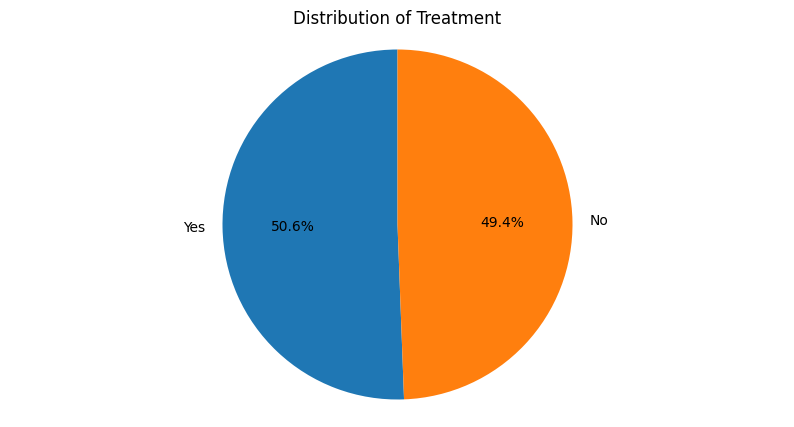

In [33]:
# Count the frequency of each category in the 'treatment' column
treatment_counts = Regression_df['treatment'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 5))
plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Treatment')
plt.axis('equal')
plt.show()

<Figure size 1000x600 with 0 Axes>

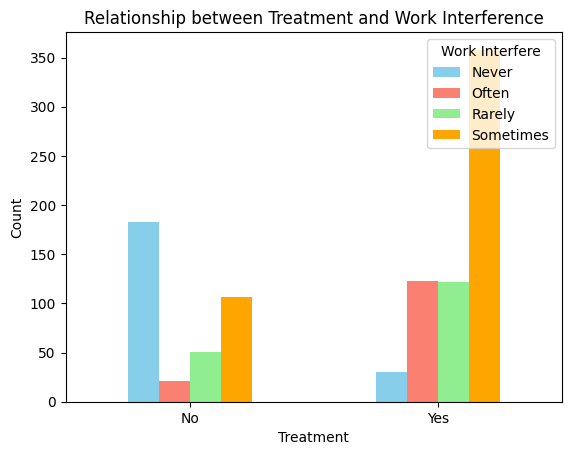

In [34]:
# Count the frequency of each combination of 'treatment' and 'work_interfere'
treatment_work_interfere_counts = Regression_df.groupby(['treatment', 'work_interfere']).size().unstack()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
treatment_work_interfere_counts.plot(kind='bar', stacked=False, color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.title('Relationship between Treatment and Work Interference')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Work Interfere', loc='upper right')
plt.show()

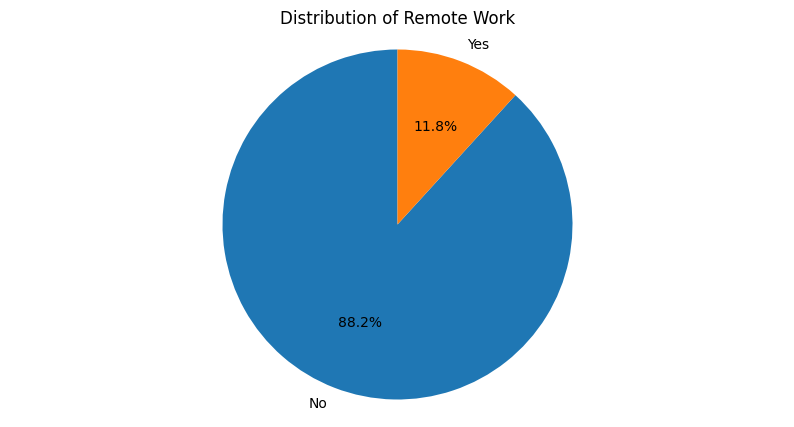

In [35]:
# Count the frequency of each category in the 'remote_work' column
treatment_counts = Regression_df['self_employed'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 5))
plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Remote Work')
plt.axis('equal')
plt.show()

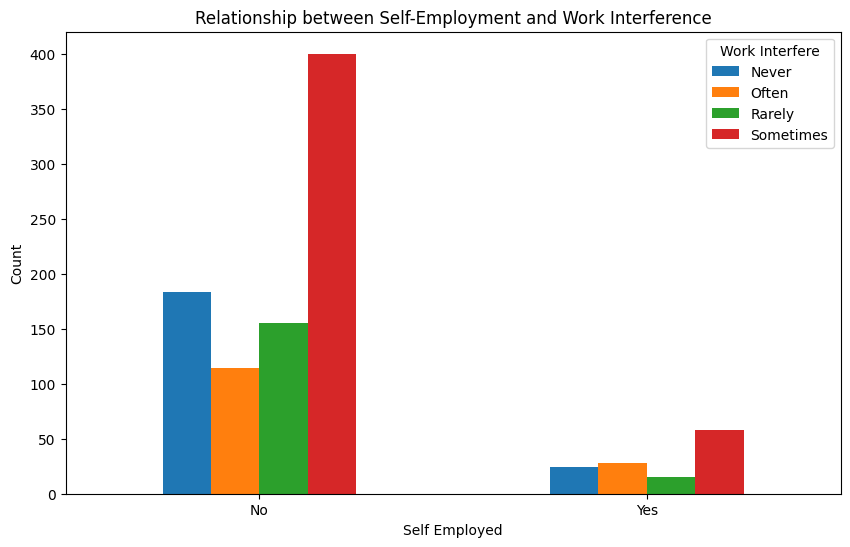

In [36]:
# Group the data by 'self_employed' and 'work_interfere' columns and count occurrences
grouped_data = Regression_df.groupby(['self_employed', 'work_interfere']).size().unstack()

# Plot the bar graph
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Relationship between Self-Employment and Work Interference')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Work Interfere')
plt.show()

In [37]:
# Dropping uneccessary columms.
Regression_new_df = Regression_df.drop(["Age", "Gender", "family_history", "Country","anonymity",'comments'], axis=1)
Regression_new_df.head(20)

,self_employed,treatment,work_interfere,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,NaN,Yes,Often,Jun-25,No,Yes,Not sure,No,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,NaN,No,Rarely,More than 1000,No,Don't know,No,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,NaN,No,Rarely,Jun-25,No,No,No,No,No,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,NaN,Yes,Often,26-100,No,No,Yes,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,NaN,No,Never,100-500,Yes,Yes,No,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,NaN,No,Sometimes,Jun-25,No,Yes,Not sure,No,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,NaN,Yes,Sometimes,01-May,Yes,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,NaN,No,Never,01-May,Yes,No,Yes,No,No,Don't know,No,No,No,No,No,No,No,No
8,NaN,Yes,Sometimes,100-500,No,Yes,Yes,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,NaN,No,Never,26-100,No,Don't know,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


In [38]:
# Check for missing/null values
print("Missing values in Dataset 1 (Regression Dataset):")
print(Regression_new_df.isnull().sum())

Missing values in Dataset 1 (Regression Dataset):
self_employed                 18
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64


In [39]:
Regression_new_df = Regression_new_df.drop(["self_employed", "work_interfere"], axis=1)
# Replace null values in 'self_employed' column with 'No'
# Regression_new_df['self_employed'].fillna('No', inplace=True)

# Replace null values in 'work_interfere' column with 'Sometimes'
# Regression_new_df['work_interfere'].fillna("Sometimes", inplace=True)

# Display the first few rows of the dataset after replacement
Regression_new_df.head(40)

,treatment,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,Yes,Jun-25,No,Yes,Not sure,No,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,No,More than 1000,No,Don't know,No,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,No,Jun-25,No,No,No,No,No,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,Yes,26-100,No,No,Yes,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,No,100-500,Yes,Yes,No,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,No,Jun-25,No,Yes,Not sure,No,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,Yes,01-May,Yes,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,No,01-May,Yes,No,Yes,No,No,Don't know,No,No,No,No,No,No,No,No
8,Yes,100-500,No,Yes,Yes,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,No,26-100,No,Don't know,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


In [40]:
# Check if the null values have been successfully replaced.
print("Missing values in Dataset 1 (Regression Dataset):")
print(Regression_new_df.isnull().sum())

Missing values in Dataset 1 (Regression Dataset):
treatment                    0
no_employees                 0
remote_work                  0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


In [41]:
# LABEL ENCODING - This is to allow the model to work with string values.
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
for col in Regression_new_df.columns:
    if Regression_new_df[col].dtype == object:
        Regression_new_df[col] = l.fit_transform(Regression_new_df[col])
Regression_new_df.head(20)

# To decode back to original labels, you can use:
# decoded_labels = label_encoder.inverse_transform(encoded_labels)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future vers

,treatment,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,1,4,0,2,1,1,2,2,1,1,1,2,1,0,2,0
1,0,5,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,4,0,1,0,1,1,1,1,1,2,2,2,2,1,0
3,1,2,0,1,2,1,1,1,2,2,1,0,0,0,1,1
4,0,1,1,2,0,0,0,0,1,1,1,2,2,2,0,0
5,0,4,0,2,1,1,0,0,1,1,2,2,1,0,0,0
6,1,0,1,1,0,1,1,1,0,0,1,0,1,1,0,0
7,0,0,1,1,2,1,1,0,1,1,0,0,1,1,1,0
8,1,1,0,2,2,1,1,3,0,1,2,2,1,0,1,0
9,0,2,0,0,0,0,0,0,1,1,2,2,0,0,2,0


In [42]:
# mapping = {'Never': 0, 'Often': 1, 'Rarely': 2, 'Sometimes': 3}

In [43]:
# URL to the Dataset: https://www.kaggle.com/datasets/thedevastator/mental-health-in-tech-survey
Classification_df = pd.read_csv ("survey.csv")
Classification_df

,index,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [44]:
Classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   index                      1259 non-null   int64 
 1   Timestamp                  1259 non-null   object
 2   Age                        1259 non-null   int64 
 3   Gender                     1259 non-null   object
 4   Country                    1259 non-null   object
 5   state                      744 non-null    object
 6   self_employed              1241 non-null   object
 7   family_history             1259 non-null   object
 8   treatment                  1259 non-null   object
 9   work_interfere             995 non-null    object
 10  no_employees               1259 non-null   object
 11  remote_work                1259 non-null   object
 12  tech_company               1259 non-null   object
 13  benefits                   1259 non-null   object
 14  care_opt

In [45]:
print("\nMissing values in Dataset 2 (Classification dataset):")
print(Classification_df.isnull().sum())


Missing values in Dataset 2 (Classification dataset):
index                           0
Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                   

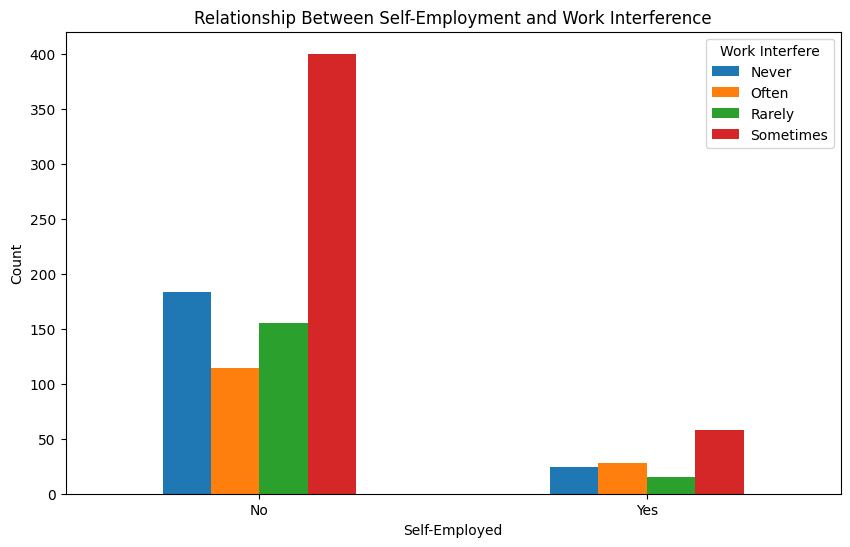

In [46]:
# Filter out rows where 'self_employed' is not null (i.e., excluding NaNs)
filtered_data = Classification_df[Classification_df['self_employed'].notnull()]

# Group by 'self_employed' and 'work_interfere' columns and count occurrences
grouped_data = filtered_data.groupby(['self_employed', 'work_interfere']).size().unstack(fill_value=0)

# Plot a bar graph
grouped_data.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Relationship Between Self-Employment and Work Interference')
plt.xlabel('Self-Employed')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.legend(title='Work Interfere')

plt.show()

# Show the plot
plt.show()

In [47]:
# print("\nDuplicate data in Dataset 2:")
# print(Classification_df[Classification_df.duplicated()])

In [48]:
# Dropping uneccessary columms.
Classification_new_df = Classification_df.drop(["index","Timestamp", "Age", "Gender", "Country", "state", "family_history", "comments"], axis=1)
Classification_new_df.head(20)



,self_employed,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,NaN,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,NaN,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,NaN,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,NaN,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,NaN,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,NaN,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,NaN,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,NaN,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No
8,NaN,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,NaN,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


In [49]:
# Replace null values in 'self_employed' column with 'No'
Classification_new_df['self_employed'].fillna('No', inplace=True)

# Replace null values in 'work_interfere' column with 'Sometimes'
Classification_new_df['work_interfere'].fillna("Sometimes", inplace=True)

# Display the first few rows of the dataset after replacement
Classification_new_df.head(40)

,self_employed,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,No,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
5,No,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No
6,No,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
7,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No
8,No,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No
9,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No


In [50]:
# LABEL ENCODING - This is to allow the model to work with string values.
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
for col in Classification_new_df.columns:
    if Classification_new_df[col].dtype == object:
        Classification_new_df[col] = l.fit_transform(Classification_new_df[col])
Classification_new_df.head(20)

# To decode back to original labels, you can use:
# decoded_labels = label_encoder.inverse_transform(encoded_labels)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future vers

,self_employed,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0,1,1,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0
1,0,0,2,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,0,2,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0
3,0,1,1,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1
4,0,0,0,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0
5,0,0,3,4,0,1,2,1,1,0,0,0,1,1,2,2,1,0,0,0
6,0,1,3,0,1,1,1,0,1,1,1,1,0,0,1,0,1,1,0,0
7,0,0,0,0,1,1,1,2,1,1,2,0,1,1,0,0,1,1,1,0
8,0,1,3,1,0,1,2,2,1,1,1,3,0,1,2,2,1,0,1,0
9,0,0,0,2,0,1,0,0,0,0,0,0,1,1,2,2,0,0,2,0
